In [1]:
import pandas as pd
from pathlib import Path
csvpath = Path('../Resources/nasdaq.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Date')
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Glen\anaconda3\envs\pyvizenv_2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return
Date,,,,,,,
2012-01-03,25.030001,25.270000,24.910000,24.959999,21.894108,1468800,0.018360
2012-01-04,24.690001,24.799999,24.430000,24.620001,21.595875,1100900,-0.013622
2012-01-05,24.360001,24.719999,24.139999,24.660000,21.630962,1072200,0.001625
2012-01-06,24.629999,24.900000,24.379999,24.430000,21.429213,1192400,-0.009327
2012-01-09,24.410000,24.660000,24.270000,24.330000,21.341490,863900,-0.004093


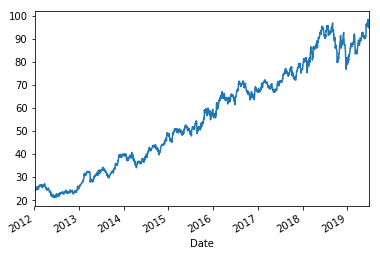

In [3]:
# The series is non-stationary (Trends upwards)
df.Close.plot()

In [5]:
df['Returns'] = df.Close.pct_change()

In [6]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Return,Returns
Date,,,,,,,,
2012-01-04,24.690001,24.799999,24.430000,24.620001,21.595875,1100900,-0.013622,-0.013622
2012-01-05,24.360001,24.719999,24.139999,24.660000,21.630962,1072200,0.001625,0.001625
2012-01-06,24.629999,24.900000,24.379999,24.430000,21.429213,1192400,-0.009327,-0.009327
2012-01-09,24.410000,24.660000,24.270000,24.330000,21.341490,863900,-0.004093,-0.004093
2012-01-10,24.580000,25.250000,24.490000,25.170000,22.078316,2647200,0.034525,0.034525


In [11]:
from statsmodels.tsa.stattools import ARMA

In [13]:
model = ARMA(df.Returns.values, order=(1,1))

C:\Users\Glen\anaconda3\envs\pyvizenv_2\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


In [14]:
results = model.fit()

In [15]:
results.forecast(steps=10)

(array([0.00059603, 0.00066766, 0.00071423, 0.00074451, 0.0007642 ,
        0.00077701, 0.00078533, 0.00079075, 0.00079427, 0.00079656]),
 array([0.01252731, 0.01253317, 0.01253565, 0.01253669, 0.01253714,
        0.01253732, 0.0125374 , 0.01253744, 0.01253745, 0.01253746]),
 array([[-0.02395705,  0.02514911],
        [-0.02389691,  0.02523222],
        [-0.02385519,  0.02528364],
        [-0.02382696,  0.02531598],
        [-0.02380813,  0.02533654],
        [-0.02379569,  0.02534971],
        [-0.02378752,  0.02535819],
        [-0.02378217,  0.02536367],
        [-0.02377868,  0.02536722],
        [-0.0237764 ,  0.02536952]]))

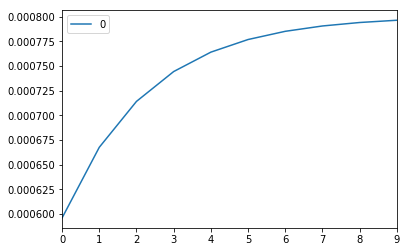

In [16]:
pd.DataFrame(results.forecast(steps=10)[0]).plot()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 1884
Model:                     ARMA(1, 1)   Log Likelihood                5578.344
Method:                       css-mle   S.D. of innovations              0.013
Date:                Mon, 22 Mar 2021   AIC                         -11148.689
Time:                        19:25:05   BIC                         -11126.524
Sample:                             0   HQIC                        -11140.526
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0008      0.000      3.040      0.002       0.000       0.001
ar.L1.y        0.6502      0.258      2.516      0.012       0.144       1.157
ma.L1.y       -0.6808      0.249     -2.734      0.006      -1.169      -0.193
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.5379           +0.0000j            1.5379            0.0000
MA.1            1.4688           +0.0000j            1.4688            0.0000
-----------------------------------------------------------------------------
"""